In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os

## Data pre-processing

In [2]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Take the path to a directory and import the images

train_dir = 'E:\\Study\\TRU\\4 Fourth Year\\Fall 2022 - University of Salford\\Deep Learning\\Assessment\\Data\\signlang\\signlang\\train'
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),
                                                    batch_size=10, class_mode='categorical')

val_dir = 'E:\\Study\\TRU\\4 Fourth Year\\Fall 2022 - University of Salford\\Deep Learning\\Assessment\\Data\\signlang\\signlang\\val'
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(128,128),
                                                 batch_size=10, class_mode='categorical')

#  Find the labels of the digits

class_dictionary = train_generator.class_indices
class_dictionary = { value:key for key,value in class_dictionary.items()}
class_list = [value for _,value in class_dictionary.items()]
print(class_list)

Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Define the network
The baseline model has <b>single</b> layers of <b>Conv2D</b>, <b>MaxPooling2D</b>, <b>Flatten</b> and <b>Dense</b> layers to classify the 10 digits

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from keras import models, layers, optimizers

network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(128,128,3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 512)               65028608  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 65,034,634
Trainable params: 65,034,634
Non-trainable params: 0
____________________________________________

## Initialize earlystopping callback and train the network

In [4]:
from keras import callbacks

# Initialize earlystopping callback
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience=3, 
                                        restore_best_weights=True)

# Train the network
digits_train_model = network.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[earlystopping])

Epoch 1/10
193/193 [==============================] - 197s 991ms/step - loss: 2.7979 - accuracy: 0.5168 - val_loss: 0.8052 - val_accuracy: 0.7135
Epoch 2/10
193/193 [==============================] - 95s 489ms/step - loss: 0.3089 - accuracy: 0.9088 - val_loss: 0.6039 - val_accuracy: 0.7956
Epoch 3/10
193/193 [==============================] - 98s 509ms/step - loss: 0.0791 - accuracy: 0.9829 - val_loss: 0.6901 - val_accuracy: 0.7847
Epoch 4/10
193/193 [==============================] - 96s 496ms/step - loss: 0.0197 - accuracy: 0.9984 - val_loss: 0.7558 - val_accuracy: 0.7993
Epoch 5/10
193/193 [==============================] - 111s 576ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.6872 - val_accuracy: 0.7993


## Evaluate performance

In [5]:
scores = network.evaluate(val_generator, verbose=0)
print("%s: %.2f%%" % (network.metrics_names[1], scores[1]*100))

accuracy: 79.56%


## Learning curves

In [6]:
# Save the history 

import pickle

dictionary_data = digits_train_model.history
history_file = open("model_data_baseline.pkl", "wb")
pickle.dump(dictionary_data, history_file)
history_file.close()

In [7]:
# load the history 

import pickle

history_file = open("model_data_baseline.pkl", "rb")
history = pickle.load(history_file)
history_file.close()
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1,len(acc)+1)

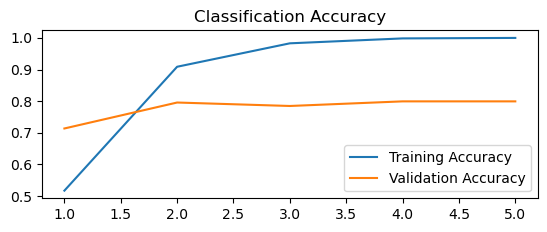

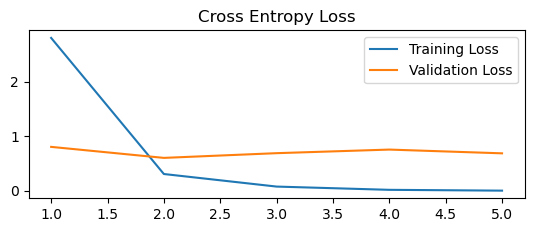

In [9]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy

plt.subplot(211)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Classification Accuracy')
plt.legend()
plt.figure()

plt.subplot(212)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.legend()

plt.show()
